In [1]:
from time import time

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

plt.style.use("ggplot")

In [2]:
spotify = pd.read_csv("data/spotify-song-attributes.csv", index_col=0)
spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [10]:
print("Spotify data shape:", spotify.shape)

Spotify data shape: (2017, 16)


In [11]:
spotify = spotify.drop(columns=["song_title", "artist"])
spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [12]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 236.4 KB


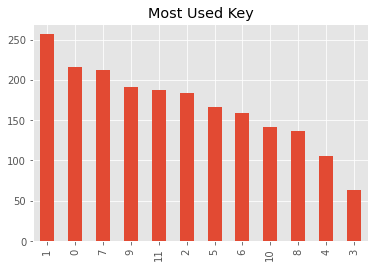

In [20]:
spotify.key.value_counts().plot(kind="bar")
plt.title("Most Used Key")
plt.show()

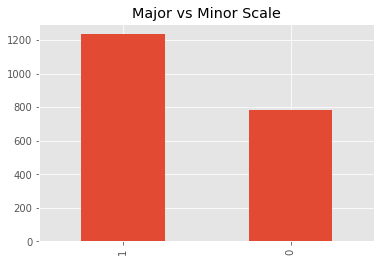

In [21]:
spotify["mode"].value_counts().plot(kind="bar")
plt.title("Major vs Minor Scale")
plt.show()

In [3]:
X = spotify[["acousticness", "danceability", "mode", "tempo"]]
y = spotify["target"]

display(X.head())
display(y)

,acousticness,danceability,mode,tempo
0,0.0102,0.833,1,150.062
1,0.1990,0.743,1,160.083
2,0.0344,0.838,1,75.044
3,0.6040,0.494,1,86.468
4,0.1800,0.678,0,174.004


0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

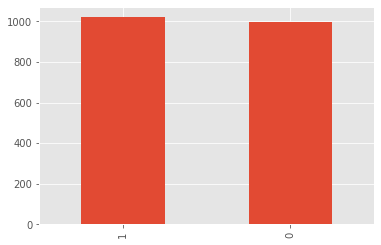

In [22]:
y.value_counts().plot(kind="bar")
plt.show()

In [35]:
def train_model(X, y, model, test_size=.3):
    X_train, X_dev, y_train, y_dev = train_test_split(
        X, y, test_size=test_size, random_state=109
    )
    print(f"Training with {X_train.shape[0]} data.. Validating with {X_dev.shape[0]}..")

    print("Standardizing data..")
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_dev = scaler.transform(X_dev)
    
    start = time()
    model.fit(X_train, y_train)
    end = time()
    print(f"Done training {model.__class__.__name__} in {end-start:.3f}s")
    
    train_prediction = model.predict(X_train)
    dev_prediction = model.predict(X_dev)

    print("Training performance:")
    print(classification_report(y_train, train_prediction))

    print("Development performance:")
    print(classification_report(y_dev, dev_prediction))
    return model, scaler

In [36]:
models = [
    LogisticRegression(),
    GaussianNB()
]

for model in models:
    print(f"== Using {model.__class__.__name__} ===")
    train_model(X, y, model)

== Using LogisticRegression ===
Training with 1411 data.. Validating with 606..
Standardizing data..
Done training LogisticRegression in 0.040s
Training performance:
              precision    recall  f1-score   support

           0       0.61      0.53      0.56       702
           1       0.59      0.66      0.62       709

    accuracy                           0.60      1411
   macro avg       0.60      0.59      0.59      1411
weighted avg       0.60      0.60      0.59      1411

Development performance:
              precision    recall  f1-score   support

           0       0.56      0.51      0.53       295
           1       0.57      0.62      0.59       311

    accuracy                           0.57       606
   macro avg       0.57      0.56      0.56       606
weighted avg       0.57      0.57      0.56       606

== Using GaussianNB ===
Training with 1411 data.. Validating with 606..
Standardizing data..
Done training GaussianNB in 0.000s
Training performance:
     

In [34]:
model = LogisticRegression()
model, scaler = train_model(X, y, model)
print(classification_report(y, model.predict(scaler.transform(X))))

Training with 1411 data.. Validating with 606..
Standardizing data..
Done training LogisticRegression in 0.033s
Training performance:
              precision    recall  f1-score   support

           0       0.61      0.53      0.56       702
           1       0.59      0.66      0.62       709

    accuracy                           0.60      1411
   macro avg       0.60      0.59      0.59      1411
weighted avg       0.60      0.60      0.59      1411

Development performance:
              precision    recall  f1-score   support

           0       0.56      0.51      0.53       295
           1       0.57      0.62      0.59       311

    accuracy                           0.57       606
   macro avg       0.57      0.56      0.56       606
weighted avg       0.57      0.57      0.56       606

              precision    recall  f1-score   support

           0       0.56      0.76      0.65       997
           1       0.65      0.43      0.52      1020

    accuracy           

In [38]:
model = Pipeline(
    [("scaler", StandardScaler()), ("classifier", LogisticRegression())]
)
# model, scaler = train_model(X, y, model)
X_train, X_dev, y_train, y_dev = train_test_split(
    X, y, test_size=.3, random_state=109
)
model.fit(X_train, y_train)
print(classification_report(y, model.predict(scaler.transform(X))))

              precision    recall  f1-score   support

           0       0.56      0.77      0.65       997
           1       0.65      0.42      0.51      1020

    accuracy                           0.59      2017
   macro avg       0.60      0.59      0.58      2017
weighted avg       0.60      0.59      0.58      2017



In [40]:
model.named_steps["classifier"]

LogisticRegression()

In [41]:
model.named_steps["scaler"]

StandardScaler()

In [42]:
joblib.dump(model, "h8-deployment\data\model.joblib")

['h8-deployment\\data\\model.joblib']

In [ ]:
# model # will throw error

In [5]:
model = joblib.load("h8-deployment\data\model.joblib")
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [8]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56       997
           1       0.58      0.65      0.62      1020

    accuracy                           0.59      2017
   macro avg       0.59      0.59      0.59      2017
weighted avg       0.59      0.59      0.59      2017

